<a href="https://colab.research.google.com/github/ZahraDehghani99/Natural-Language-Processing/blob/main/HW1/HW1_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home Work 1

## Data preparation
In this section, we want to work on the Hamshahri corpus dataset. From the rar file, we use data in ham2->corpus. This directory consists of news files from 1996 to 2007. We want to work on one year's news. I select 2007 news.

In [1]:
# Libraries for parsing XML
import xml.etree.ElementTree as ET
import pandas as pd  
import csv
import re
import os

# plot
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Let's take a look at folders inside the path
os.listdir("/content/drive/MyDrive/AI-Internship/HAM2")

['1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007']

In [4]:
print(f'number of files in 2007 folder : {len(os.listdir("/content/drive/MyDrive/AI-Internship/HAM2/2007"))} \n')
print(f'some files in 2007 : {os.listdir("/content/drive/MyDrive/AI-Internship/HAM2/2007")[:10]}')

number of files in 2007 folder : 90 

some files in 2007 : ['hamshahri.dtd', 'HAM2-070102.xml', 'HAM2-070101.xml', 'HAM2-070110.xml', 'HAM2-070103.xml', 'HAM2-070106.xml', 'HAM2-070107.xml', 'HAM2-070104.xml', 'HAM2-070121.xml', 'HAM2-070114.xml']


As we can see, news files are in the XML format. We should parse the XML files and then convert them to csv file. 

In the above we can see we have a DTD file. Let's take a look at this file.

In [5]:
!cat /content/drive/MyDrive/AI-Internship/HAM2/2007/hamshahri.dtd

<?xml version="1.0" encoding="ISO-8859-1"?>
<!ELEMENT HAMSHAHRI2 (COPYRIGHT, DOC+)>
<!ELEMENT DOC (DOCID, DOCNO, ORIGINALFILE, ISSUE, DATE, CAT, CAT, TITLE, TEXT)>
<!ELEMENT DOCID (#PCDATA)>
<!ELEMENT DOCNO (#PCDATA)>
<!ELEMENT ORIGINALFILE (#PCDATA)>
<!ELEMENT ISSUE (#PCDATA)>
<!ELEMENT DATE (#PCDATA)>
<!ATTLIST DATE calender (Persian | Western) #REQUIRED>
<!ELEMENT CAT (#PCDATA)>
<!ATTLIST CAT xml:lang (en | fa) #REQUIRED>
<!ELEMENT TITLE (#PCDATA)>
<!ELEMENT TEXT (#PCDATA)>

In [6]:
# store file names in the filename. We don't need a DTD file. So, we select elements from index 1 to the end.
filename = os.listdir("/content/drive/MyDrive/AI-Internship/HAM2/2007")[1:]
print(f'number of XML files in 2007 : {len(filename)}')

number of XML files in 2007 : 89


Let's take a look at the first file to see its content.

In [7]:
# Reading the first file
filepath = "/content/drive/MyDrive/AI-Internship/HAM2/2007"
file_path_file1 = os.path.join(filepath, filename[0])
tree = ET.parse(file_path_file1)
root = tree.getroot()
print(f'root.tag and root.atrib : {root.tag} {root.attrib}')

root.tag and root.atrib : HAMSHAHRI2 {}


In [8]:
elements = [elem.tag for elem in root.iter()]
print(f'all elements in the tree : {set(elements)}')

all elements in the tree : {'ORIGINALFILE', 'COPYRIGHT', 'TITLE', 'DATE', 'DOCNO', 'TEXT', 'DOCID', 'CAT', 'DOC', 'HAMSHAHRI2', 'IMAGE', 'ISSUE'}


In [9]:
child_list = []
for child in root:    
  child_list.append([child.tag, child.attrib]) 
print(f'children of the root : {child_list}\n')
print(f'number of childrens in first file : {len(child_list)}')

children of the root : [['COPYRIGHT', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', {}], ['DOC', 

In [10]:
print(ET.tostring(child, encoding='utf8').decode('utf8'))

<?xml version='1.0' encoding='utf8'?>
<DOC>
<DOCID>HAM2-851012-100</DOCID>
<DOCNO>HAM2-851012-100</DOCNO>
<ORIGINALFILE>/1385/851012/world/_siasatw.htm</ORIGINALFILE>
<ISSUE>سه شنبه 12 دي 1385</ISSUE>
<DATE calender="Western">2007-01-02</DATE>
<DATE calender="Persian">1385/10/12</DATE>
<CAT xml:lang="fa">سیاسی</CAT>
<CAT xml:lang="en">Politics</CAT>
<TITLE>
هيچ نگراني وجود ندارد
الياس نادران نماينده مجلس در گفت وگو با همشهري انتخابات 24 آذر را ارزيابي مي كند
</TITLE>
<TEXT>
<IMAGE>/1385/851012/world/008517.jpg</IMAGE>

داريوش غفاري
الياس نادران از نمايندگان مجلس هفتم است كه در ليست ائتلاف آبادگران ايران اسلامي در انتخابات هفتمين دوره مجلس شوراي اسلامي به مجلس راه يافت.
وي همواره يكي از نيروهاي موثر در اصولگرايان مجلس بوده كه بيشتر در بخش اقتصادي مجلس هفتم نظرات كارشناسانه متعددي ارايه كرده است.
نادران عليرغم اينكه عضو فراكسيون اصولگرايان مجلس شوراي اسلامي است اما هميشه رويه اي مستقل و منتقدانه نسبت به رفتار اصولگرايان از جمله عملكرد دولت داشته است گر چه در زمان مقتضي حمايت هاي خود را ن

As we can see, some DOCs has IMAGE child.

In [11]:
for child in root.findall('./DOC/TEXT/'):
  print(child.tag, child.attrib)

IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}
IMAGE {}


## Convert XML to CSV

In this section we want to convert XML files to a CSV file. Each DOC in a XML file has different parts but we need only 4 of them (id, title, text and label). So our CSV file must have 4 columns and each row corresponds to each DOC in XML files.

In [11]:
from xml.etree.ElementTree import ParseError

cols = ['id', 'title','text','label']
csv_file = open('hamshahri-2007.csv', 'w', newline='')
csvwriter = csv.writer(csv_file, lineterminator ='\n')
csvwriter.writerow(cols)

def make_csv(folderpath, xmlfilename, csvwriter, csv_file):
  try:
    # parse each xml file
    for i in range(len(xmlfilename)):
      tree = ET.parse(os.path.join(folderpath, xmlfilename[i]))
      root = tree.getroot()

      for elem in root.findall("DOC") :
        rows = []
        # parse DOCID
        id = elem.find("DOCID")
        if id != None:
          id = id.text
        rows.append(id)

        # parse TITLE
        title = elem.find("TITLE")
        if title != None:
          title = re.sub('\n', ' ', title.text)
        rows.append(title)  

        # parse TEXT (thanks to https://stackoverflow.com/questions/68847136/parsing-xml-cdata-section-and-convert-it-to-csv-using-elementtree-python
        # I found out how to read CDATA *after* IMAGE child in some DOCs)
        sent = elem.find("TEXT")
        if sent != None:
          sentence = list(sent)[-1].tail.strip() if list(sent) else sent.text.strip()
          sentence = re.sub('\n', ' ', sentence)
          select_sentence = sentence.split('.')[:2] # select two first sentences
          select_sentence = '.'.join(select_sentence)
        rows.append(select_sentence)

        # parse CAT
        label = elem.find('CAT')
        if label != None:
          label = label.text
        rows.append(label)  

        # write rows in csv file
        csvwriter.writerow(rows)
    csv_file.close()
  
  except ParseError:
    print(xmlfilename[i])
    raise

In [12]:
filepath = "/content/drive/MyDrive/AI-Internship/HAM2/2007"
make_csv(filepath, filename, csvwriter, csv_file)

In [13]:
df = pd.read_csv('/content/hamshahri-2007.csv')
df.head()

,id,title,text,label
0,HAM2-851012-001,22 نمايش اين هفته در تالارهاي مختلف به اجرا د...,گروه ادب و هنر- با نزديك شدن به بيست و پنجمين ...,ادب و هنر
1,HAM2-851012-002,مردگان، فيلم برگزيده منتقدان,مهر: انجمن منتقدان فيلم شيكاگو درام جنايي مردگ...,ادب و هنر
2,HAM2-851012-003,برنامه هاي امروز جشنواره موسيقي فجر,گروه ادب و هنر- امروز گروه موسيقي بانوان ياورا...,ادب و هنر
3,HAM2-851012-004,پاسخ پارسايي به اعتراض هنرمندانآثاري كه از جش...,واحد مركزي خبر: رئيس مركز هنرهاي نمايشي گفت: ت...,ادب و هنر
4,HAM2-851012-005,تجلي كودك از دريچه معنويت,گروه ادب و هنر- موزه هنرهاي معاصر فلسطين كه هم...,ادب و هنر


In [14]:
print(f'hamshahri-2007 shape : {df.shape}')

hamshahri-2007 shape : (9364, 4)


In [15]:
df.label.value_counts()

اجتماعی                                       1157
سیاسی                                         1066
گوناگون                                       1035
اقتصاد                                         880
گوناگون.شهری                                   865
اقتصاد.بورس و بانک                             653
ادب و هنر                                      637
گوناگون.خارجی                                  624
گوناگون.حوادث                                  538
علمی فرهنگی.علمی.ارتباطات و فناوری اطلاعات     393
علمی فرهنگی.علمی.پزشکی و درمان                 306
ادب و هنر.هنر.سینما                            253
علمی فرهنگی.علمی                               226
ادب و هنر.هنر.تئاتر                            145
علمی فرهنگی                                    134
ادب و هنر.هنر                                  103
علمی فرهنگی.علمی.کتاب                           99
گردشگری                                         68
ادب و هنر.ادبیات                                52
ادب و هنر.هنر.موسیقی           

Let's show the distribution of data in each class. First we should install some libraries to show persian words in the correct way.

In [17]:
!pip install -q python-bidi
!pip install -q arabic-reshaper

In [18]:
# libraries for show persian words in correct way(right to left)
from bidi.algorithm import get_display
from arabic_reshaper import reshape

y = pd.DataFrame(df['label'])
classes = [get_display(reshape(label)) for label in y.label]
y = pd.DataFrame(classes)
y.columns = ['label']

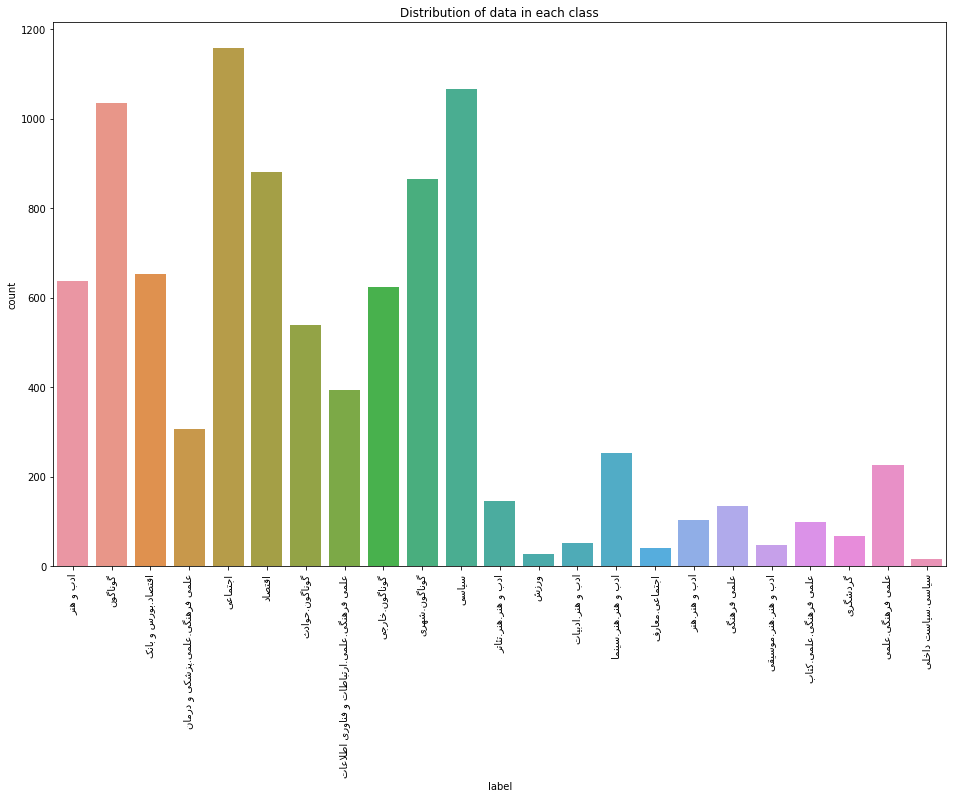

In [19]:
fig = plt.figure(figsize=(16,10))
sns.countplot(x="label", data=y)
plt.title("Distribution of data in each class")
plt.xticks(rotation=90)
plt.rc('xtick', labelsize=15)
plt.show()

we want to use just social news for our dataset.

In [16]:
mask_column = ['اجتماعی']
dataset = df.copy()
df_social = dataset.loc[dataset['label'].isin(mask_column)]

In [17]:
df_social.head()

,id,title,text,label
20,HAM2-851012-021,سازمان بهزيستي مطرح كرد درخواست افزايش 6 براب...,گروه اجتماعي- سازمان بهزيستي رشد 6 برابري بودج...,اجتماعی
21,HAM2-851012-022,با مردم,پرندگان را دريابيم پرندگان زيباترين نشانه هاي ...,اجتماعی
22,HAM2-851012-023,با ابلاغ شيوه نامه اجرايي پرونده هاي مطالبه م...,گروه اجتماعي - آيت الله هاشمي شاهرودي، رئيس قو...,اجتماعی
23,HAM2-851012-024,مهلت 2 ماهه وزارت رفاه براي راه اندازي بانك ا...,فارس: عضو كميسيون اجتماعي مجلس از مهلت 2 ماهه ...,اجتماعی
24,HAM2-851012-025,برنامه جامع كنترل آسيب هاي اجتماعي تدوين شد,فارس: رئيس سازمان بهزيستي كشور از تدوين برنامه...,اجتماعی


In [18]:
print(f'social shape : {df_social.shape}')

social shape : (1157, 4)


Let's write the text of this new dataset in a .txt file and use this dataset in language model.Each line should have on sentence.

In [19]:
text = [txt for txt in df_social.text]
sentences = [sent.split('.') for sent in text]
line = []
for i in sentences:
  for j in i:
    line.append(j)
print(f'number of lines : {len(line)}')    

number of lines : 2314


In [20]:
with open('social.txt', 'w', encoding='utf-8') as f:
  for sent in line:
    f.write(str(sent))
    f.write('\n')